# Initial values

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
gamma = 0.99
R = 1.0
beta_tau = 0.94
y_lower = 8000
y_upper = 18000
y_3 = 13000
y_1 = 11000
y_mode = 15900 # triangular
y_mean = 13000 # normal
sigma = np.sqrt(1000000) # normal

In [ ]:
psi = np.log(y_3) - np.log(gamma * y_3)
b_upper_tau = (1 - gamma * np.exp(- beta_tau * psi)) * y_upper
b_lower_tau = (1 - gamma * np.exp(- beta_tau * psi)) * y_lower

print(f"debt level where default starts = {b_lower_tau:.3f}")
print(f"debt level with always default = {b_upper_tau:.3f}")

debt level where default starts = 154.470
debt level with always default = 347.558


# PDF

In [ ]:
uniform_pdf = lambda y: 1 / (y_upper - y_lower) if y_lower <= y <= y_upper else 0

def truncated_normal_pdf(y):
    normalization_constant = norm.cdf(y_upper, y_mean, sigma) - norm.cdf(y_lower, y_mean, sigma)

    if y_lower <= y <= y_upper:
        pdf_at_y = norm.pdf(y, y_mean, sigma)
        truncated_pdf = pdf_at_y / normalization_constant
        return truncated_pdf
    else:
        return 0

def triangular_pdf(y):
    if y_lower <= y <= y_mode:
        return 2 * (y - y_lower) / ((y_upper - y_lower) * (y_mode - y_lower))
    elif y_mode < y <= y_upper:
        return 2 * (y_upper - y) / ((y_upper - y_lower) * (y_upper - y_mode))
    else:
        return 0

# CDF

In [ ]:
def truncated_normal_cdf(y):
    # Calculate the CDF of the normal distribution at y, y_lower, and y_upper
    cdf_at_y = norm.cdf(y, y_mean, sigma)
    cdf_at_y_lower = norm.cdf(y_lower, y_mean, sigma)
    cdf_at_y_upper = norm.cdf(y_upper, y_mean, sigma)
    if y < y_lower:
        return 0
    elif y > y_upper:
        return 1
    else:
        # Adjusted CDF for the truncated range
        return (cdf_at_y - cdf_at_y_lower) / (cdf_at_y_upper - cdf_at_y_lower)


def uniform_cdf(y):
    if y < y_lower:
        return 0
    elif y_lower <= y <= y_upper:
        return (y - y_lower) / (y_upper - y_lower)
    else:
        return 1


def triangular_cdf(y):
    if y < y_lower:
        return 0
    elif y_lower <= y < y_mode:
        return ((y - y_lower)**2) / ((y_upper - y_lower) * (y_mode - y_lower))
    elif y_mode <= y <= y_upper:
        return 1 - ((y_upper - y)**2) / ((y_upper - y_lower) * (y_upper - y_mode))
    else:
        return 1

# Different distributions

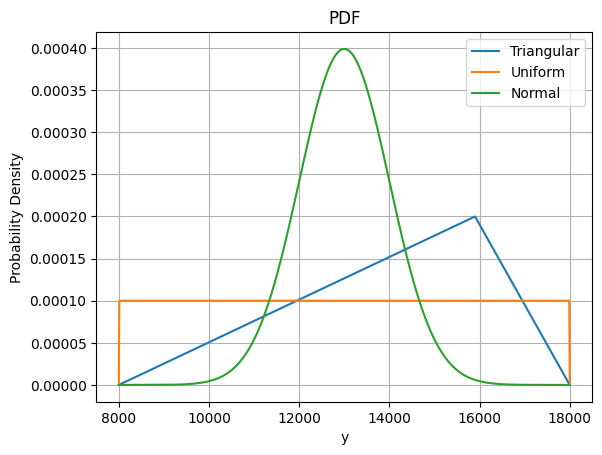

In [ ]:
# Generate y values for plotting
y_values = np.linspace(y_lower - 0.1, y_upper + 0.1, 1000)

# Calculate PDF values
pdf_values_triangular = [triangular_pdf(y) for y in y_values]
pdf_values_uniform = [uniform_pdf(y) for y in y_values]
pdf_values_truncated_normal = [truncated_normal_pdf(y) for y in y_values]

# Plotting all PDFs on the same graph
plt.plot(y_values, pdf_values_triangular, label='Triangular')
plt.plot(y_values, pdf_values_uniform, label='Uniform')
plt.plot(y_values, pdf_values_truncated_normal, label='Normal')
plt.title('PDF')
plt.xlabel('y')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Case 1

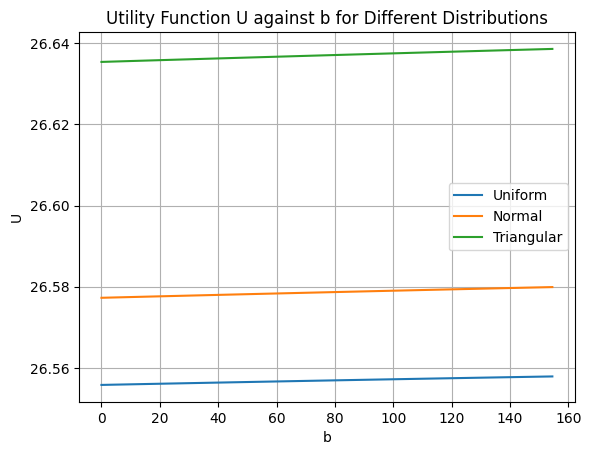

In [ ]:
b_values_case1 = np.linspace(0, b_lower_tau, 100)
U_values_uniform_case1 = []
U_values_normal_case1 = []
U_values_triangular_case1 = []

for b in b_values_case1:
    y_tau = b / (1 - gamma * np.exp(- beta_tau * psi))

    # Calculate CDF values for y_tau using each distribution
    cdf_uniform = uniform_cdf(y_tau)
    cdf_normal = truncated_normal_cdf(y_tau)
    cdf_triangular = triangular_cdf(y_tau)

    # Calculate q_tau for each distribution
    q_uniform = (1 / R) * (1 - cdf_uniform)
    q_normal = (1 / R) * (1 - cdf_normal)
    q_triangular = (1 / R) * (1 - cdf_triangular)

    integral_uniform, _ = quad(lambda y_2: np.log(y_2 - b) * uniform_pdf(y_2), y_lower, y_upper)
    integral_normal, _ = quad(lambda y_2: np.log(y_2 - b) * truncated_normal_pdf(y_2), y_lower, y_upper)
    integral_triangular, _ = quad(lambda y_2: np.log(y_2 - b) * triangular_pdf(y_2), y_lower, y_upper)

    # Calculate U for each distribution and append to respective lists
    U_uniform = np.log(y_1 + b * q_uniform) + beta_tau * integral_uniform + (beta_tau ** 2) * np.log(y_3)
    U_normal = np.log(y_1 + b * q_normal) + beta_tau * integral_normal + (beta_tau ** 2) * np.log(y_3)
    U_triangular = np.log(y_1 + b * q_triangular) + beta_tau * integral_triangular + (beta_tau ** 2) * np.log(y_3)

    U_values_uniform_case1.append(U_uniform)
    U_values_normal_case1.append(U_normal)
    U_values_triangular_case1.append(U_triangular)

# Plotting
plt.plot(b_values_case1, U_values_uniform_case1, label='Uniform')
plt.plot(b_values_case1, U_values_normal_case1, label='Normal')
plt.plot(b_values_case1, U_values_triangular_case1, label='Triangular')
plt.title('Utility Function U against b for Different Distributions')
plt.xlabel('b')
plt.ylabel('U')
plt.legend()
plt.grid(True)
plt.show()

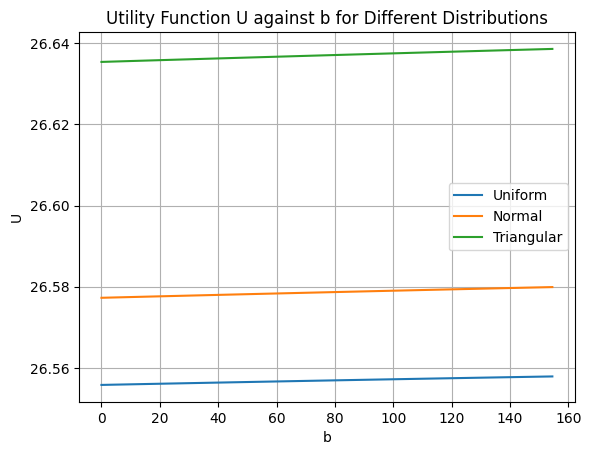

In [ ]:
b_values_case1 = np.linspace(0, b_lower_tau, 100)
U_values_uniform_case1 = []
U_values_normal_case1 = []
U_values_triangular_case1 = []

for b in b_values_case1:
    y_tau = b / (1 - gamma * np.exp(- beta_tau * psi))

    # Calculate CDF values for y_tau using each distribution
    cdf_uniform = uniform_cdf(y_tau)
    cdf_normal = truncated_normal_cdf(y_tau)
    cdf_triangular = triangular_cdf(y_tau)

    # Calculate q_tau for each distribution
    q_uniform = (1 / R) * (1 - cdf_uniform)
    q_normal = (1 / R) * (1 - cdf_normal)
    q_triangular = (1 / R) * (1 - cdf_triangular)

    integral_uniform, _ = quad(lambda y_2: np.log(y_2 - b) * uniform_pdf(y_2), y_lower, y_upper)
    integral_normal, _ = quad(lambda y_2: np.log(y_2 - b) * truncated_normal_pdf(y_2), y_lower, y_upper)
    integral_triangular, _ = quad(lambda y_2: np.log(y_2 - b) * triangular_pdf(y_2), y_lower, y_upper)

    # Calculate U for each distribution and append to respective lists
    U_uniform = np.log(y_1 + b/R) + beta_tau * integral_uniform + (beta_tau ** 2) * np.log(y_3)
    U_normal = np.log(y_1 + b/R) + beta_tau * integral_normal + (beta_tau ** 2) * np.log(y_3)
    U_triangular = np.log(y_1 + b/R) + beta_tau * integral_triangular + (beta_tau ** 2) * np.log(y_3)

    U_values_uniform_case1.append(U_uniform)
    U_values_normal_case1.append(U_normal)
    U_values_triangular_case1.append(U_triangular)

# Plotting
plt.plot(b_values_case1, U_values_uniform_case1, label='Uniform')
plt.plot(b_values_case1, U_values_normal_case1, label='Normal')
plt.plot(b_values_case1, U_values_triangular_case1, label='Triangular')
plt.title('Utility Function U against b for Different Distributions')
plt.xlabel('b')
plt.ylabel('U')
plt.legend()
plt.grid(True)
plt.show()

# Case 2

## Bond Price in case 2 and period 2

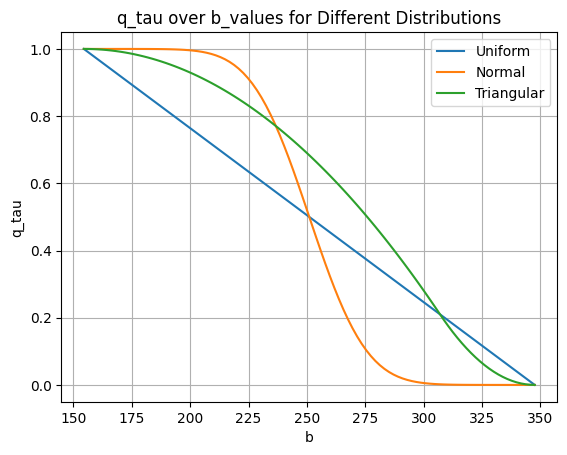

In [ ]:
b_values_case2 = np.linspace(b_lower_tau, b_upper_tau, 100)
q_tau_uniform = []
q_tau_normal = []
q_tau_triangular = []


for b in b_values_case2:
    y_tau = b / (1 - gamma * np.exp(- beta_tau * psi))

    # Calculate CDF values for y_tau using each distribution
    cdf_uniform = uniform_cdf(y_tau)
    cdf_normal = truncated_normal_cdf(y_tau)
    cdf_triangular = triangular_cdf(y_tau)

    # Calculate q_tau for each distribution
    q_uniform = (1 / R) * (1 - cdf_uniform)
    q_normal = (1 / R) * (1 - cdf_normal)
    q_triangular = (1 / R) * (1 - cdf_triangular)

    # Append to lists
    q_tau_uniform.append(q_uniform)
    q_tau_normal.append(q_normal)
    q_tau_triangular.append(q_triangular)

# Plotting
plt.plot(b_values_case2, q_tau_uniform, label='Uniform')
plt.plot(b_values_case2, q_tau_normal, label='Normal')
plt.plot(b_values_case2, q_tau_triangular, label='Triangular')
plt.title('q_tau over b_values for Different Distributions')
plt.xlabel('b')
plt.ylabel('q_tau')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
b_values_case2 = np.linspace(b_lower_tau, b_upper_tau, 100)
U_values_uniform_case2, U_values_normal_case2, U_values_triangular_case2 = [], [], []

for b in b_values_case2:
    y_tau = b / (1 - gamma * np.exp(-beta_tau * psi))

    # Calculate q_tau and CDF(y_tau) for each distribution
    cdf_uniform = uniform_cdf(y_tau)
    cdf_normal = truncated_normal_cdf(y_tau)
    cdf_triangular = triangular_cdf(y_tau)

    q_uniform = (1 / R) * (1 - cdf_uniform)
    q_normal = (1 / R) * (1 - cdf_normal)
    q_triangular = (1 / R) * (1 - cdf_triangular)

    # Define integrands for the integrals
    def integrand_1_uniform(y_2): return np.log(y_2 - b) * uniform_pdf(y_2)
    def integrand_2_uniform(y_2): return np.log(gamma * y_2) * uniform_pdf(y_2)

    def integrand_1_normal(y_2): return np.log(y_2 - b) * truncated_normal_pdf(y_2)
    def integrand_2_normal(y_2): return np.log(gamma * y_2) * truncated_normal_pdf(y_2)

    def integrand_1_triangular(y_2): return np.log(y_2 - b) * triangular_pdf(y_2)
    def integrand_2_triangular(y_2): return np.log(gamma * y_2) * triangular_pdf(y_2)

    # Compute integrals
    integral_1_uniform, _ = quad(integrand_1_uniform, y_tau, y_upper)
    integral_2_uniform, _ = quad(integrand_2_uniform, y_lower, y_tau)

    integral_1_normal, _ = quad(integrand_1_normal, y_tau, y_upper)
    integral_2_normal, _ = quad(integrand_2_normal, y_lower, y_tau)

    integral_1_triangular, _ = quad(integrand_1_triangular, y_tau, y_upper)
    integral_2_triangular, _ = quad(integrand_2_triangular, y_lower, y_tau)

    # Calculate U for each distribution
    U_uniform = np.log(y_1 + q_uniform * b) + beta_tau * integral_1_uniform + (beta_tau ** 2) * np.log(y_3) * (1 - cdf_uniform) + beta_tau * integral_2_uniform + (beta_tau ** 2) * np.log(gamma * y_3) * cdf_uniform
    U_normal = np.log(y_1 + q_normal * b) + beta_tau * integral_1_normal + (beta_tau ** 2) * np.log(y_3) * (1 - cdf_normal) + beta_tau * integral_2_normal + (beta_tau ** 2) * np.log(gamma * y_3) * cdf_normal
    U_triangular = np.log(y_1 + q_triangular * b) + beta_tau * integral_1_triangular + (beta_tau ** 2) * np.log(y_3) * (1 - cdf_triangular) + beta_tau * integral_2_triangular + (beta_tau ** 2) * np.log(gamma * y_3) * cdf_triangular

    # Append to the lists
    U_values_uniform_case2.append(U_uniform)
    U_values_normal_case2.append(U_normal)
    U_values_triangular_case2.append(U_triangular)

# plt.plot(b_values_case2, U_values_uniform_case2, label='Uniform')
# plt.plot(b_values_case2, U_values_normal_case2, label='Normal')
# plt.plot(b_values_case2, U_values_triangular_case2, label='Triangular')
# #plt.title('q_tau over b_values for Different Distributions')
# plt.xlabel('b')
# plt.ylabel('U2')
# plt.legend()
# plt.grid(True)
# plt.show()

# Case 3

In [ ]:
b_values_case3 = np.linspace(b_upper_tau, y_3, 100)
U_values_uniform_case3 = []
U_values_normal_case3 = []
U_values_triangular_case3 = []

for b in b_values_case3:

    # Compute integrals for each PDF
    integral_uniform, _ = quad(lambda y_2: np.log(gamma * y_2) * uniform_pdf(y_2), y_lower, y_upper)
    integral_normal, _ = quad(lambda y_2: np.log(gamma * y_2) * truncated_normal_pdf(y_2), y_lower, y_upper)
    integral_triangular, _ = quad(lambda y_2: np.log(gamma * y_2) * triangular_pdf(y_2), y_lower, y_upper)

    # Calculate U for each distribution and append to respective lists
    U_uniform = np.log(y_1) + beta_tau * integral_uniform + (beta_tau ** 2) * np.log(gamma * y_3)
    U_normal = np.log(y_1) + beta_tau * integral_normal + (beta_tau ** 2) * np.log(gamma * y_3)
    U_triangular = np.log(y_1) + beta_tau * integral_triangular + (beta_tau ** 2) * np.log(gamma * y_3)

    U_values_uniform_case3.append(U_uniform)
    U_values_normal_case3.append(U_normal)
    U_values_triangular_case3.append(U_triangular)

# # Plotting
# plt.plot(b_values_case3, U_values_uniform_case3, label='Uniform')
# plt.plot(b_values_case3, U_values_normal_case3, label='Normal')
# plt.plot(b_values_case3, U_values_triangular_case3, label='Triangular')
# plt.title('Utility Function U against b for Different Distributions')
# plt.xlabel('b')
# plt.ylabel('U')
# plt.legend()
# plt.grid(True)
# plt.show()

# Total U

In [ ]:
b_values_case1 = np.linspace(0, b_lower_tau, 100)
b_values_case2 = np.linspace(b_lower_tau, b_upper_tau, 100)
b_values_case3 = np.linspace(b_upper_tau, y_3, 100)

U_values_uniform_case1, U_values_normal_case1, U_values_triangular_case1 = [], [], []
U_values_uniform_case2, U_values_normal_case2, U_values_triangular_case2 = [], [], []
U_values_uniform_case3, U_values_normal_case3, U_values_triangular_case3 = [], [], []


for b in b_values_case1:
    integral_uniform, _ = quad(lambda y_2: np.log(y_2 - b) * uniform_pdf(y_2), y_lower, y_upper)
    integral_normal, _ = quad(lambda y_2: np.log(y_2 - b) * truncated_normal_pdf(y_2), y_lower, y_upper)
    integral_triangular, _ = quad(lambda y_2: np.log(y_2 - b) * triangular_pdf(y_2), y_lower, y_upper)

    # Calculate U for each distribution and append to respective lists
    U_uniform = np.log(y_1 + b/R) + beta_tau * integral_uniform + (beta_tau ** 2) * np.log(y_3)
    U_normal = np.log(y_1 + b/R) + beta_tau * integral_normal + (beta_tau ** 2) * np.log(y_3)
    U_triangular = np.log(y_1 + b/R) + beta_tau * integral_triangular + (beta_tau ** 2) * np.log(y_3)

    U_values_uniform_case1.append(U_uniform)
    U_values_normal_case1.append(U_normal)
    U_values_triangular_case1.append(U_triangular)


for b in b_values_case2:
    y_tau = b / (1 - gamma * np.exp(-beta_tau * psi))

    # Calculate q_tau and CDF(y_tau) for each distribution
    cdf_uniform = uniform_cdf(y_tau)
    cdf_normal = truncated_normal_cdf(y_tau)
    cdf_triangular = triangular_cdf(y_tau)

    q_uniform = (1 / R) * (1 - cdf_uniform)
    q_normal = (1 / R) * (1 - cdf_normal)
    q_triangular = (1 / R) * (1 - cdf_triangular)

    # Define integrands for the integrals
    def integrand_1_uniform(y_2): return np.log(y_2 - b) * uniform_pdf(y_2)
    def integrand_2_uniform(y_2): return np.log(gamma * y_2) * uniform_pdf(y_2)

    def integrand_1_normal(y_2): return np.log(y_2 - b) * truncated_normal_pdf(y_2)
    def integrand_2_normal(y_2): return np.log(gamma * y_2) * truncated_normal_pdf(y_2)

    def integrand_1_triangular(y_2): return np.log(y_2 - b) * triangular_pdf(y_2)
    def integrand_2_triangular(y_2): return np.log(gamma * y_2) * triangular_pdf(y_2)

    # Compute integrals
    integral_1_uniform, _ = quad(integrand_1_uniform, y_tau, y_upper)
    integral_2_uniform, _ = quad(integrand_2_uniform, y_lower, y_tau)

    integral_1_normal, _ = quad(integrand_1_normal, y_tau, y_upper)
    integral_2_normal, _ = quad(integrand_2_normal, y_lower, y_tau)

    integral_1_triangular, _ = quad(integrand_1_triangular, y_tau, y_upper)
    integral_2_triangular, _ = quad(integrand_2_triangular, y_lower, y_tau)

    # Calculate U for each distribution
    U_uniform = np.log(y_1 + q_uniform * b) + beta_tau * integral_1_uniform + (beta_tau ** 2) * np.log(y_3) * (1 - cdf_uniform) + beta_tau * integral_2_uniform + (beta_tau ** 2) * np.log(gamma * y_3) * cdf_uniform
    U_normal = np.log(y_1 + q_normal * b) + beta_tau * integral_1_normal + (beta_tau ** 2) * np.log(y_3) * (1 - cdf_normal) + beta_tau * integral_2_normal + (beta_tau ** 2) * np.log(gamma * y_3) * cdf_normal
    U_triangular = np.log(y_1 + q_triangular * b) + beta_tau * integral_1_triangular + (beta_tau ** 2) * np.log(y_3) * (1 - cdf_triangular) + beta_tau * integral_2_triangular + (beta_tau ** 2) * np.log(gamma * y_3) * cdf_triangular

    # Append to the lists
    U_values_uniform_case2.append(U_uniform)
    U_values_normal_case2.append(U_normal)
    U_values_triangular_case2.append(U_triangular)


for b in b_values_case3:

    # Compute integrals for each PDF
    integral_uniform, _ = quad(lambda y_2: np.log(gamma * y_2) * uniform_pdf(y_2), y_lower, y_upper)
    integral_normal, _ = quad(lambda y_2: np.log(gamma * y_2) * truncated_normal_pdf(y_2), y_lower, y_upper)
    integral_triangular, _ = quad(lambda y_2: np.log(gamma * y_2) * triangular_pdf(y_2), y_lower, y_upper)

    # Calculate U for each distribution and append to respective lists
    U_uniform = np.log(y_1) + beta_tau * integral_uniform + (beta_tau ** 2) * np.log(gamma * y_3)
    U_normal = np.log(y_1) + beta_tau * integral_normal + (beta_tau ** 2) * np.log(gamma * y_3)
    U_triangular = np.log(y_1) + beta_tau * integral_triangular + (beta_tau ** 2) * np.log(gamma * y_3)

    U_values_uniform_case3.append(U_uniform)
    U_values_normal_case3.append(U_normal)
    U_values_triangular_case3.append(U_triangular)

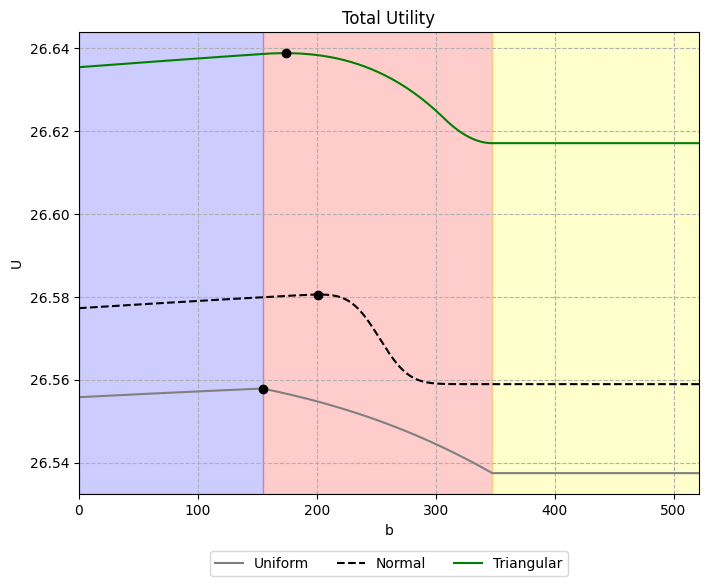

In [ ]:
b_values_combined = np.concatenate((b_values_case1, b_values_case2, b_values_case3))
U_values_uniform_combined = np.concatenate((U_values_uniform_case1, U_values_uniform_case2, U_values_uniform_case3))
U_values_normal_combined = np.concatenate((U_values_normal_case1, U_values_normal_case2, U_values_normal_case3))
U_values_triangular_combined = np.concatenate((U_values_triangular_case1, U_values_triangular_case2, U_values_triangular_case3))

max_index_uniform = np.argmax(U_values_uniform_combined)
max_index_normal = np.argmax(U_values_normal_combined)
max_index_triangular = np.argmax(U_values_triangular_combined)

max_b_uniform = b_values_combined[max_index_uniform]
max_b_normal = b_values_combined[max_index_normal]
max_b_triangular = b_values_combined[max_index_triangular]


plt.figure(figsize=(8, 6))
plt.plot(b_values_combined, U_values_uniform_combined, label='Uniform', alpha=1, color='gray')
plt.plot(b_values_combined, U_values_normal_combined, label='Normal', linestyle='--', alpha=1, color='black')
plt.plot(b_values_combined, U_values_triangular_combined, label='Triangular', color='green')


plt.title('Total Utility')
plt.xlabel('b')
plt.ylabel('U')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.xlim(0, 1.5 * max(b_values_case2))
plt.grid(True, linestyle='--')


plt.scatter(max_b_uniform, U_values_uniform_combined[max_index_uniform], color='black', zorder=3)
plt.scatter(max_b_normal, U_values_normal_combined[max_index_normal], color='black', zorder=3)
plt.scatter(max_b_triangular, U_values_triangular_combined[max_index_triangular], color='black', zorder=3)


plt.axvspan(min(b_values_case1), max(b_values_case1), color='blue', alpha=0.2)
plt.axvspan(min(b_values_case2), max(b_values_case2), color='red', alpha=0.2)
plt.axvspan(min(b_values_case3), max(b_values_case3), color='yellow', alpha=0.2)
plt.show()


In [ ]:
y_tau_max_uniform = max_b_uniform / (1 - gamma * np.exp(- beta_tau * psi))
y_tau_max_normal = max_b_normal / (1 - gamma * np.exp(- beta_tau * psi))
y_tau_max_triangular = max_b_triangular / (1 - gamma * np.exp(- beta_tau * psi))

cdf_uniform = uniform_cdf(y_tau_max_uniform)
cdf_normal = truncated_normal_cdf(y_tau_max_normal)
cdf_triangular = triangular_cdf(y_tau_max_triangular)

prob_default_uniform = (cdf_uniform)
prob_default_normal = (cdf_normal)
prob_default_triangular = (cdf_triangular)


print(f"Optimal debt level (Uniform) = {max_b_uniform:.3f}")
print(f"Optimal debt level (Normal) = {max_b_normal:.3f}")
print(f"Optimal debt level (Triangular) = {max_b_triangular:.3f}")

print(f"Default rate at the optimal debt level (Uniform) = {prob_default_uniform:.4f}")
print(f"Default rate at the optimal debt level (Normal) = {prob_default_normal:.4f}")
print(f"Default rate at the optimal debt level (Triangular) = {prob_default_triangular:.4f}")

Optimal debt level (Uniform) = 154.470
Optimal debt level (Normal) = 201.280
Optimal debt level (Triangular) = 173.974
Default rate at the optimal debt level (Uniform) = 0.0000
Default rate at the optimal debt level (Normal) = 0.0050
Default rate at the optimal debt level (Triangular) = 0.0129


# U in period 1

In [ ]:
b_values_case1 = np.linspace(0, b_lower_tau, 100)
b_values_case2 = np.linspace(b_lower_tau, b_upper_tau, 100)
b_values_case3 = np.linspace(b_upper_tau, y_3, 100)

U_values_uniform_case1, U_values_normal_case1, U_values_triangular_case1 = [], [], []
U_values_uniform_case2, U_values_normal_case2, U_values_triangular_case2 = [], [], []
U_values_uniform_case3, U_values_normal_case3, U_values_triangular_case3 = [], [], []


for b in b_values_case1:
    # Calculate U for each distribution and append to respective lists
    U_uniform = np.log(y_1 + b/R)
    U_normal = np.log(y_1 + b/R)
    U_triangular = np.log(y_1 + b/R)

    U_values_uniform_case1.append(U_uniform)
    U_values_normal_case1.append(U_normal)
    U_values_triangular_case1.append(U_triangular)


for b in b_values_case2:
    y_tau = b / (1 - gamma * np.exp(-beta_tau * psi))

    # Calculate q_tau and CDF(y_tau) for each distribution
    cdf_uniform = uniform_cdf(y_tau)
    cdf_normal = truncated_normal_cdf(y_tau)
    cdf_triangular = triangular_cdf(y_tau)

    q_uniform = (1 / R) * (1 - cdf_uniform)
    q_normal = (1 / R) * (1 - cdf_normal)
    q_triangular = (1 / R) * (1 - cdf_triangular)

    # Calculate U for each distribution
    U_uniform = np.log(y_1 + q_uniform * b)
    U_normal = np.log(y_1 + q_normal * b)
    U_triangular = np.log(y_1 + q_triangular * b)

    # Append to the lists
    U_values_uniform_case2.append(U_uniform)
    U_values_normal_case2.append(U_normal)
    U_values_triangular_case2.append(U_triangular)


for b in b_values_case3:

    # Calculate U for each distribution and append to respective lists
    U_uniform = np.log(y_1)
    U_normal = np.log(y_1)
    U_triangular = np.log(y_1)

    U_values_uniform_case3.append(U_uniform)
    U_values_normal_case3.append(U_normal)
    U_values_triangular_case3.append(U_triangular)

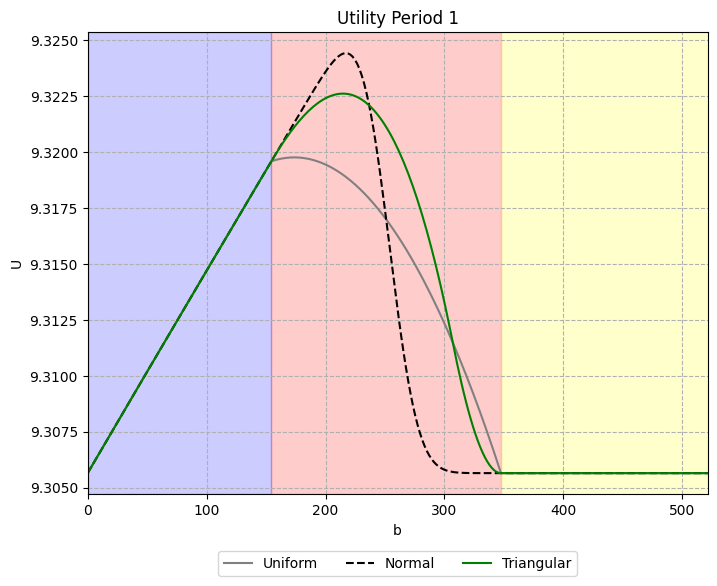

In [ ]:
b_values_combined = np.concatenate((b_values_case1, b_values_case2, b_values_case3))
U_values_uniform_combined = np.concatenate((U_values_uniform_case1, U_values_uniform_case2, U_values_uniform_case3))
U_values_normal_combined = np.concatenate((U_values_normal_case1, U_values_normal_case2, U_values_normal_case3))
U_values_triangular_combined = np.concatenate((U_values_triangular_case1, U_values_triangular_case2, U_values_triangular_case3))


plt.figure(figsize=(8, 6))
plt.plot(b_values_combined, U_values_uniform_combined, label='Uniform', alpha=1, color='gray')
plt.plot(b_values_combined, U_values_normal_combined, label='Normal', linestyle='--', alpha=1, color='black')
plt.plot(b_values_combined, U_values_triangular_combined, label='Triangular', color='green')
plt.title('Utility Period 1')
plt.xlabel('b')
plt.ylabel('U')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.xlim(0, 1.5 * max(b_values_case2))
plt.grid(True, linestyle='--')
plt.axvspan(min(b_values_case1), max(b_values_case1), color='blue', alpha=0.2)
plt.axvspan(min(b_values_case2), max(b_values_case2), color='red', alpha=0.2)
plt.axvspan(min(b_values_case3), max(b_values_case3), color='yellow', alpha=0.2)
plt.show()

# U in period 2

In [ ]:
b_values_case1 = np.linspace(0, b_lower_tau, 100)
b_values_case2 = np.linspace(b_lower_tau, b_upper_tau, 100)
b_values_case3 = np.linspace(b_upper_tau, y_3, 100)

U_values_uniform_case1, U_values_normal_case1, U_values_triangular_case1 = [], [], []
U_values_uniform_case2, U_values_normal_case2, U_values_triangular_case2 = [], [], []
U_values_uniform_case3, U_values_normal_case3, U_values_triangular_case3 = [], [], []


for b in b_values_case1:
    integral_uniform, _ = quad(lambda y_2: np.log(y_2 - b) * uniform_pdf(y_2), y_lower, y_upper)
    integral_normal, _ = quad(lambda y_2: np.log(y_2 - b) * truncated_normal_pdf(y_2), y_lower, y_upper)
    integral_triangular, _ = quad(lambda y_2: np.log(y_2 - b) * triangular_pdf(y_2), y_lower, y_upper)

    # Calculate U for each distribution and append to respective lists
    U_uniform = beta_tau * integral_uniform
    U_normal = beta_tau * integral_normal
    U_triangular = beta_tau * integral_triangular

    U_values_uniform_case1.append(U_uniform)
    U_values_normal_case1.append(U_normal)
    U_values_triangular_case1.append(U_triangular)


for b in b_values_case2:
    y_tau = b / (1 - gamma * np.exp(-beta_tau * psi))

    # Calculate q_tau and CDF(y_tau) for each distribution
    cdf_uniform = uniform_cdf(y_tau)
    cdf_normal = truncated_normal_cdf(y_tau)
    cdf_triangular = triangular_cdf(y_tau)

    q_uniform = (1 / R) * (1 - cdf_uniform)
    q_normal = (1 / R) * (1 - cdf_normal)
    q_triangular = (1 / R) * (1 - cdf_triangular)

    # Define integrands for the integrals
    def integrand_1_uniform(y_2): return np.log(y_2 - b) * uniform_pdf(y_2)
    def integrand_2_uniform(y_2): return np.log(gamma * y_2) * uniform_pdf(y_2)

    def integrand_1_normal(y_2): return np.log(y_2 - b) * truncated_normal_pdf(y_2)
    def integrand_2_normal(y_2): return np.log(gamma * y_2) * truncated_normal_pdf(y_2)

    def integrand_1_triangular(y_2): return np.log(y_2 - b) * triangular_pdf(y_2)
    def integrand_2_triangular(y_2): return np.log(gamma * y_2) * triangular_pdf(y_2)

    # Compute integrals
    integral_1_uniform, _ = quad(integrand_1_uniform, y_tau, y_upper)
    integral_2_uniform, _ = quad(integrand_2_uniform, y_lower, y_tau)

    integral_1_normal, _ = quad(integrand_1_normal, y_tau, y_upper)
    integral_2_normal, _ = quad(integrand_2_normal, y_lower, y_tau)

    integral_1_triangular, _ = quad(integrand_1_triangular, y_tau, y_upper)
    integral_2_triangular, _ = quad(integrand_2_triangular, y_lower, y_tau)

    # Calculate U for each distribution
    U_uniform = beta_tau * integral_1_uniform + beta_tau * integral_2_uniform
    U_normal = beta_tau * integral_1_normal + beta_tau * integral_2_normal
    U_triangular = beta_tau * integral_1_triangular + beta_tau * integral_2_triangular

    # Append to the lists
    U_values_uniform_case2.append(U_uniform)
    U_values_normal_case2.append(U_normal)
    U_values_triangular_case2.append(U_triangular)


for b in b_values_case3:

    # Compute integrals for each PDF
    integral_uniform, _ = quad(lambda y_2: np.log(gamma * y_2) * uniform_pdf(y_2), y_lower, y_upper)
    integral_normal, _ = quad(lambda y_2: np.log(gamma * y_2) * truncated_normal_pdf(y_2), y_lower, y_upper)
    integral_triangular, _ = quad(lambda y_2: np.log(gamma * y_2) * triangular_pdf(y_2), y_lower, y_upper)

    # Calculate U for each distribution and append to respective lists
    U_uniform = beta_tau * integral_uniform
    U_normal = beta_tau * integral_normal
    U_triangular = beta_tau * integral_triangular

    U_values_uniform_case3.append(U_uniform)
    U_values_normal_case3.append(U_normal)
    U_values_triangular_case3.append(U_triangular)

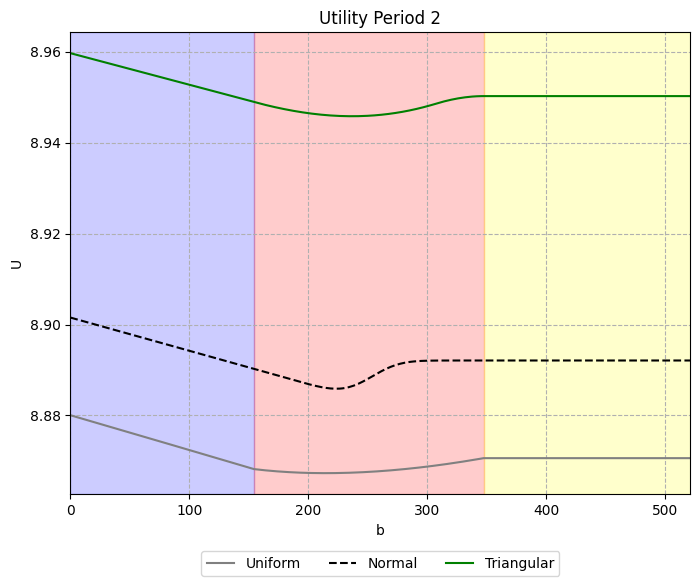

In [ ]:
b_values_combined = np.concatenate((b_values_case1, b_values_case2, b_values_case3))
U_values_uniform_combined = np.concatenate((U_values_uniform_case1, U_values_uniform_case2, U_values_uniform_case3))
U_values_normal_combined = np.concatenate((U_values_normal_case1, U_values_normal_case2, U_values_normal_case3))
U_values_triangular_combined = np.concatenate((U_values_triangular_case1, U_values_triangular_case2, U_values_triangular_case3))


plt.figure(figsize=(8, 6))
plt.plot(b_values_combined, U_values_uniform_combined, label='Uniform', alpha=1, color='gray')
plt.plot(b_values_combined, U_values_normal_combined, label='Normal', linestyle='--', alpha=1, color='black')
plt.plot(b_values_combined, U_values_triangular_combined, label='Triangular', color='green')
plt.title('Utility Period 2')
plt.xlabel('b')
plt.ylabel('U')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.xlim(0, 1.5 * max(b_values_case2))
plt.grid(True, linestyle='--')
plt.axvspan(min(b_values_case1), max(b_values_case1), color='blue', alpha=0.2)
plt.axvspan(min(b_values_case2), max(b_values_case2), color='red', alpha=0.2)
plt.axvspan(min(b_values_case3), max(b_values_case3), color='yellow', alpha=0.2)
plt.show()

# U in period 3

In [ ]:
b_values_case1 = np.linspace(0, b_lower_tau, 100)
b_values_case2 = np.linspace(b_lower_tau, b_upper_tau, 100)
b_values_case3 = np.linspace(b_upper_tau, y_3, 100)

U_values_uniform_case1, U_values_normal_case1, U_values_triangular_case1 = [], [], []
U_values_uniform_case2, U_values_normal_case2, U_values_triangular_case2 = [], [], []
U_values_uniform_case3, U_values_normal_case3, U_values_triangular_case3 = [], [], []


for b in b_values_case1:

    # Calculate U for each distribution and append to respective lists
    U_uniform = (beta_tau ** 2) * np.log(y_3)
    U_normal = (beta_tau ** 2) * np.log(y_3)
    U_triangular = (beta_tau ** 2) * np.log(y_3)

    U_values_uniform_case1.append(U_uniform)
    U_values_normal_case1.append(U_normal)
    U_values_triangular_case1.append(U_triangular)


for b in b_values_case2:
    y_tau = b / (1 - gamma * np.exp(-beta_tau * psi))

    # Calculate q_tau and CDF(y_tau) for each distribution
    cdf_uniform = uniform_cdf(y_tau)
    cdf_normal = truncated_normal_cdf(y_tau)
    cdf_triangular = triangular_cdf(y_tau)

    q_uniform = (1 / R) * (1 - cdf_uniform)
    q_normal = (1 / R) * (1 - cdf_normal)
    q_triangular = (1 / R) * (1 - cdf_triangular)

    # Calculate U for each distribution
    U_uniform = (beta_tau ** 2) * np.log(y_3) * (1 - cdf_uniform) + (beta_tau ** 2) * np.log(gamma * y_3) * cdf_uniform
    U_normal = (beta_tau ** 2) * np.log(y_3) * (1 - cdf_normal) + (beta_tau ** 2) * np.log(gamma * y_3) * cdf_normal
    U_triangular = (beta_tau ** 2) * np.log(y_3) * (1 - cdf_triangular) + (beta_tau ** 2) * np.log(gamma * y_3) * cdf_triangular

    # Append to the lists
    U_values_uniform_case2.append(U_uniform)
    U_values_normal_case2.append(U_normal)
    U_values_triangular_case2.append(U_triangular)


for b in b_values_case3:

    # Compute integrals for each PDF
    integral_uniform, _ = quad(lambda y_2: np.log(gamma * y_2) * uniform_pdf(y_2), y_lower, y_upper)
    integral_normal, _ = quad(lambda y_2: np.log(gamma * y_2) * truncated_normal_pdf(y_2), y_lower, y_upper)
    integral_triangular, _ = quad(lambda y_2: np.log(gamma * y_2) * triangular_pdf(y_2), y_lower, y_upper)

    # Calculate U for each distribution and append to respective lists
    U_uniform = np.log(y_1) + beta_tau * integral_uniform + (beta_tau ** 2) * np.log(gamma * y_3)
    U_normal = np.log(y_1) + beta_tau * integral_normal + (beta_tau ** 2) * np.log(gamma * y_3)
    U_triangular = np.log(y_1) + beta_tau * integral_triangular + (beta_tau ** 2) * np.log(gamma * y_3)

    U_values_uniform_case3.append(U_uniform)
    U_values_normal_case3.append(U_normal)
    U_values_triangular_case3.append(U_triangular)

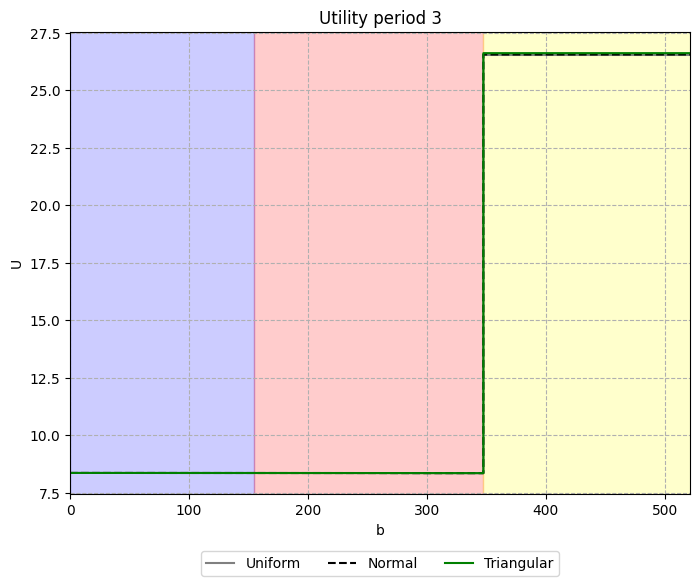

In [ ]:
b_values_combined = np.concatenate((b_values_case1, b_values_case2, b_values_case3))
U_values_uniform_combined = np.concatenate((U_values_uniform_case1, U_values_uniform_case2, U_values_uniform_case3))
U_values_normal_combined = np.concatenate((U_values_normal_case1, U_values_normal_case2, U_values_normal_case3))
U_values_triangular_combined = np.concatenate((U_values_triangular_case1, U_values_triangular_case2, U_values_triangular_case3))


plt.figure(figsize=(8, 6))
plt.plot(b_values_combined, U_values_uniform_combined, label='Uniform', alpha=1, color='gray')
plt.plot(b_values_combined, U_values_normal_combined, label='Normal', linestyle='--', alpha=1, color='black')
plt.plot(b_values_combined, U_values_triangular_combined, label='Triangular', color='green')
plt.title('Utility period 3')
plt.xlabel('b')
plt.ylabel('U')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.xlim(0, 1.5 * max(b_values_case2))
plt.grid(True, linestyle='--')
plt.axvspan(min(b_values_case1), max(b_values_case1), color='blue', alpha=0.2)
plt.axvspan(min(b_values_case2), max(b_values_case2), color='red', alpha=0.2)
plt.axvspan(min(b_values_case3), max(b_values_case3), color='yellow', alpha=0.2)
plt.show()